# Land use collocation

In [1]:
import pandas as pd

blocks_gdf = pd.read_pickle('./../../data/saint_petersburg/blocks.pickle')

In [2]:
from blocksnet.relations import generate_adjacency_graph

adjacency_graph = generate_adjacency_graph(blocks_gdf, 10)

2025-09-19 17:36:33.960 | INFO     | blocksnet.relations.adjacency.core:_generate_adjacency_nodes:9 - Generating nodes
2025-09-19 17:36:33.966 | INFO     | blocksnet.relations.adjacency.core:_generate_adjacency_edges:14 - Generating edges
2025-09-19 17:36:36.986 | SUCCESS  | blocksnet.relations.adjacency.core:generate_adjacency_graph:37 - Adjacency graph successfully generated: 9533 nodes, 30567 edges


In [4]:
from blocksnet.analysis.land_use import land_use_collocation

collocation_df = land_use_collocation(adjacency_graph, blocks_gdf)
collocation_df.head()

100%|██████████| 9533/9533 [00:04<00:00, 2025.75it/s]


,land_use,site_area,collocation
0,LandUse.TRANSPORT,0.032316,1.000000
1,LandUse.AGRICULTURE,137101.088247,0.512737
2,LandUse.RESIDENTIAL,95239.084434,1.000000
3,LandUse.RESIDENTIAL,125919.330984,1.000000
4,LandUse.RESIDENTIAL,169860.164494,0.485577


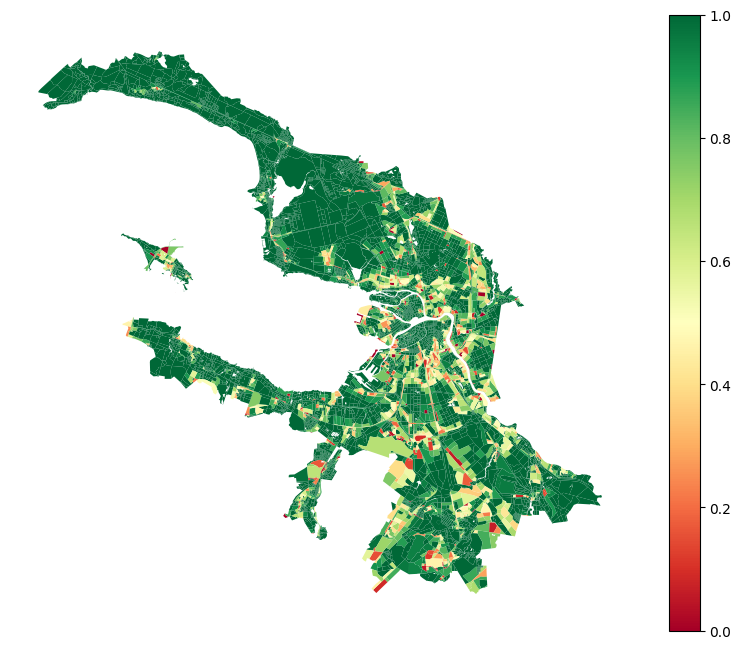

In [5]:
blocks_gdf[['geometry']].join(collocation_df).plot('collocation', vmin=0, vmax=1, cmap='RdYlGn', legend=True, figsize=(10,8)).set_axis_off()